### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [1]:
%cd ..

/home/datascience/DF-DM


### Setup Environment:

In [2]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion

In [3]:
PATH = 'Embeddings/mimic/'
COLUMN = 'embeddings'

num_epochs = 30

## Get data

### Merge and preprocess the datasets

In [4]:
df = pd.read_csv('Embeddings_c/mimic/embeddings.csv')
df.disease_label = df.disease_label.astype(str)
df.race_label = df.race_label.astype(str)
df.head()

,path,race_label,sex_label,disease_label,subject_id,study_id,split,file_path,text_1,text_2,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,p19/p19702416/s51321189/d85c9f15-f0f84927-761f...,0,0,3,19702416,51321189,train,datasets/mimic/files/p19/p19702416/s51321189.txt,0.019312,-0.016845,...,-1.977094,0.664772,-2.003561,0.063048,0.218469,-2.259382,-1.804749,-3.272988,1.671752,-2.163086
1,p13/p13339704/s51292704/0024603b-12db30e2-ab32...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.012198,-0.027218,...,-2.502330,-0.262871,-2.777717,1.082299,1.273291,-1.900938,-1.250531,-3.238538,1.466622,-3.243235
2,p13/p13339704/s51292704/7953848d-2411f0df-859f...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.012198,-0.027218,...,-2.352660,0.049591,-2.599992,0.709397,0.635155,-2.035155,-1.170720,-3.293882,1.306690,-2.955477
3,p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...,0,0,3,12668169,54048859,train,datasets/mimic/files/p12/p12668169/s54048859.txt,0.023151,-0.003735,...,-2.531913,0.778623,-3.406011,0.288661,1.660015,-2.785958,-1.350666,-2.999661,2.809513,-3.075176
4,p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...,0,0,3,10309415,58144222,train,datasets/mimic/files/p10/p10309415/s58144222.txt,0.022132,-0.021821,...,-1.868888,0.562119,-1.824777,0.069089,1.093687,-1.628035,-1.373444,-3.014874,1.524349,-2.403681


In [5]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
full_columns = [column for column in df.columns if 'image' in column]
midpoint = len(full_columns) // 2

# Split the list into two halves
image_columns = full_columns[:midpoint]
text_columns = full_columns[midpoint:]

Train Shape: (107695, 4872)
Test Shape: (30360, 4872)


## Disease

In [6]:
label_columns = 'disease_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

In [7]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))

Training Early Fusion Model:
The number of parameters of the model are: 99204
Epoch 1/30 - Test Accuracy: 0.4092, macro-f1: 0.3260, macro-AUC: 0.6102
Epoch 1/30 - Training Time: 10.24 seconds | Inference Time: 2.42 seconds
Epoch 2/30 - Test Accuracy: 0.4521, macro-f1: 0.3488, macro-AUC: 0.6248
Epoch 2/30 - Training Time: 11.79 seconds | Inference Time: 3.10 seconds
Epoch 3/30 - Test Accuracy: 0.3796, macro-f1: 0.3099, macro-AUC: 0.6176
Epoch 3/30 - Training Time: 8.70 seconds | Inference Time: 2.07 seconds
Epoch 4/30 - Test Accuracy: 0.4621, macro-f1: 0.3537, macro-AUC: 0.6256
Epoch 4/30 - Training Time: 11.41 seconds | Inference Time: 2.71 seconds
Epoch 5/30 - Test Accuracy: 0.5034, macro-f1: 0.3652, macro-AUC: 0.6296
Epoch 5/30 - Training Time: 11.73 seconds | Inference Time: 2.75 seconds
Epoch 6/30 - Test Accuracy: 0.5183, macro-f1: 0.3714, macro-AUC: 0.6294
Epoch 6/30 - Training Time: 14.23 seconds | Inference Time: 1.87 seconds
Epoch 7/30 - Test Accuracy: 0.4259, macro-f1: 0.3366,

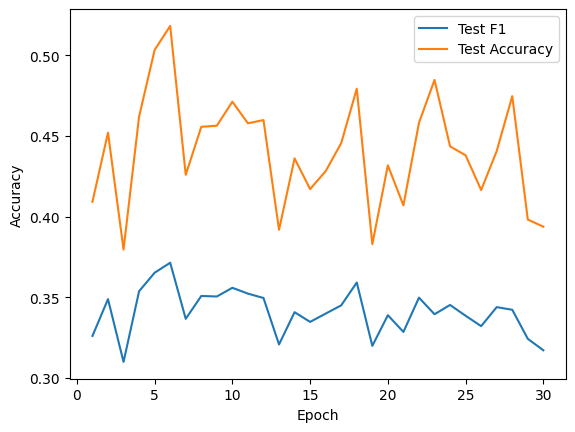

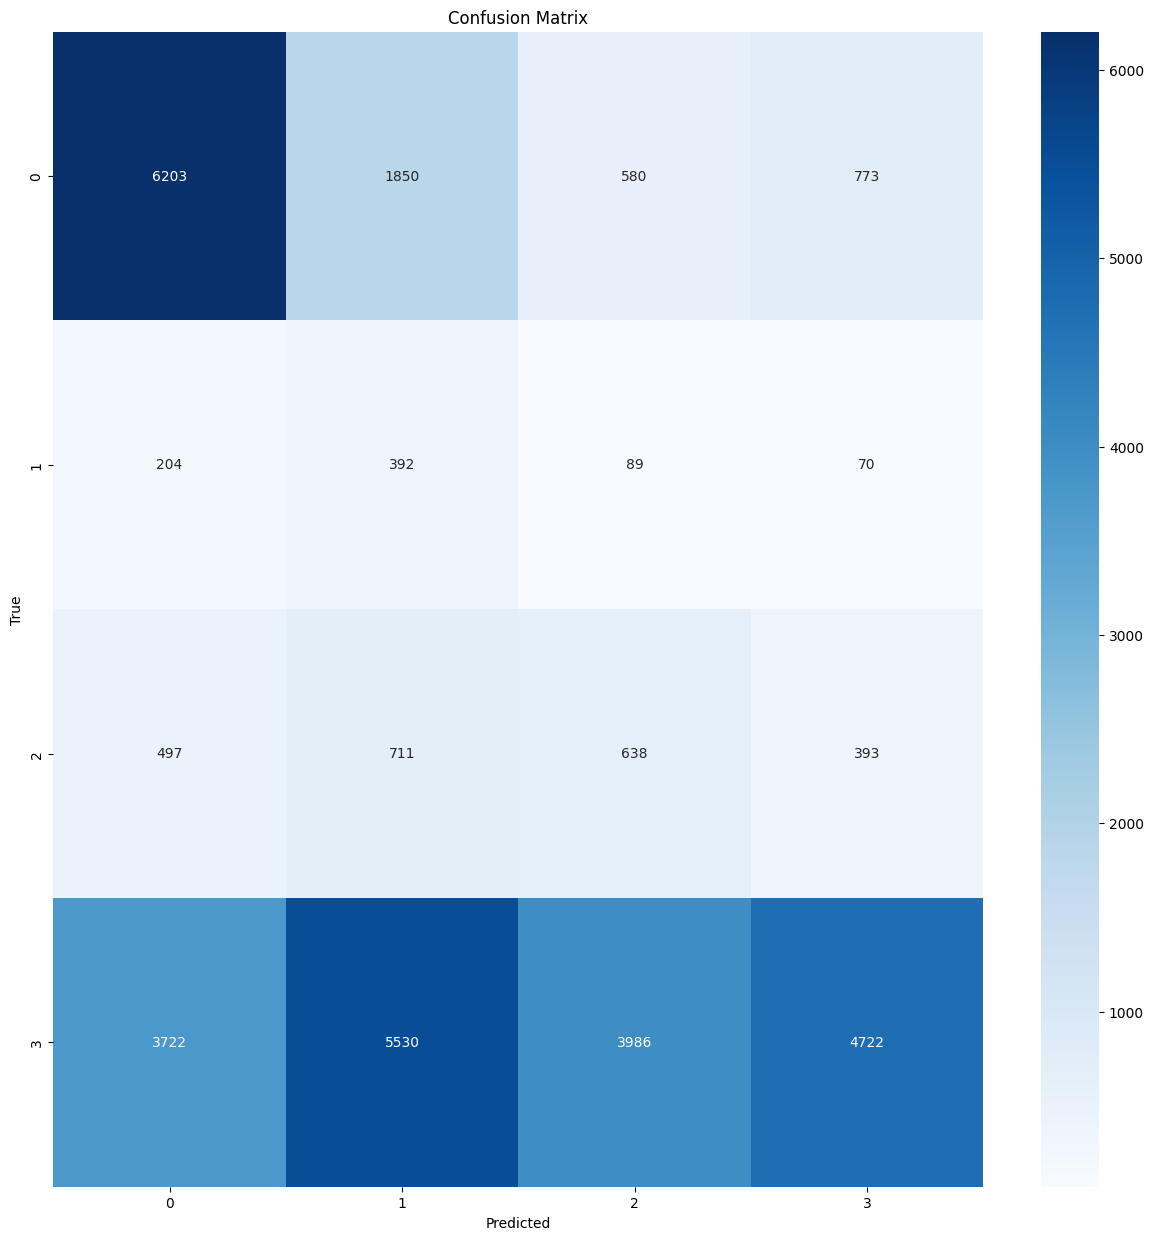

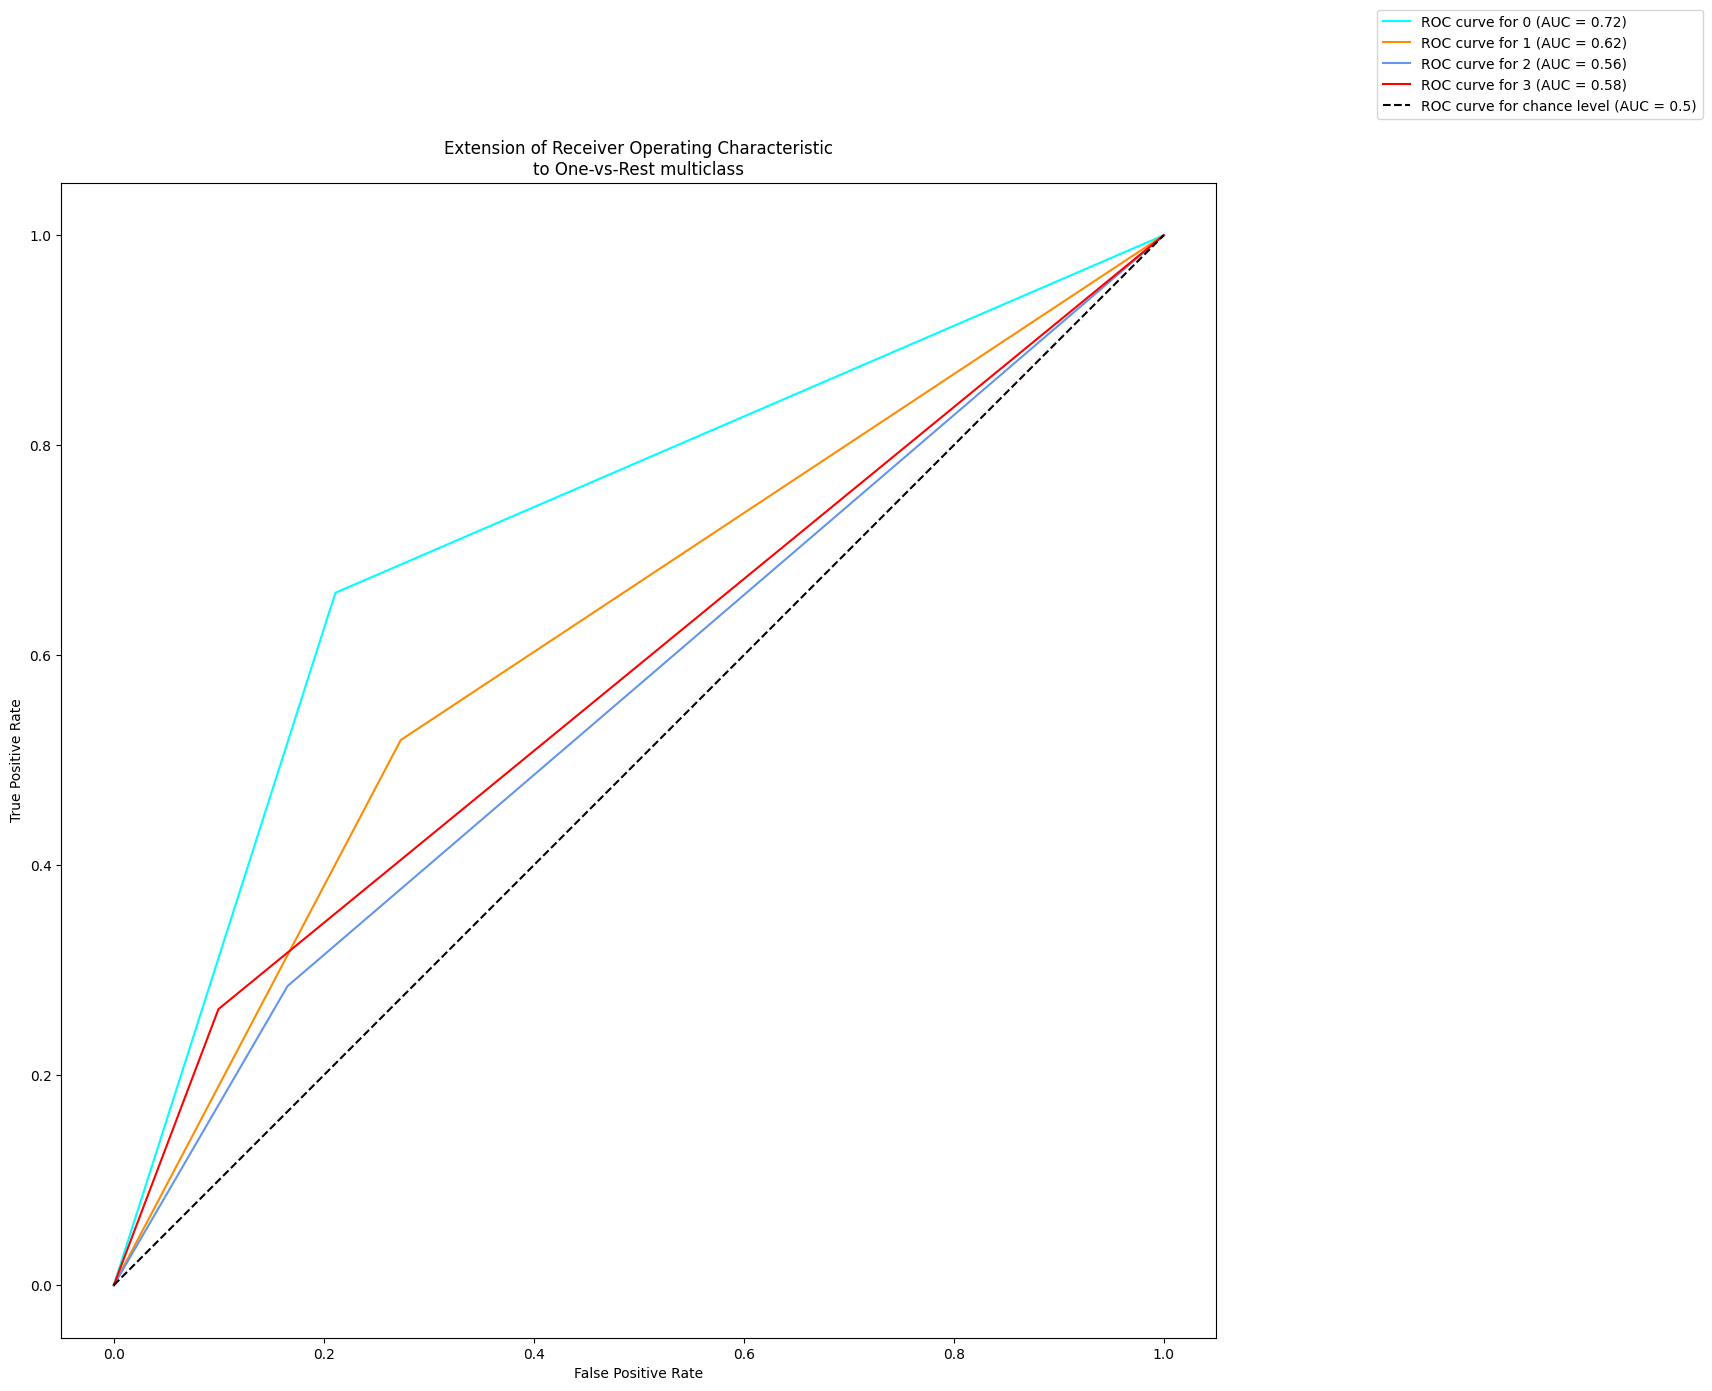

              precision    recall  f1-score   support

           0       0.58      0.66      0.62      9406
           1       0.05      0.52      0.08       755
           2       0.12      0.28      0.17      2239
           3       0.79      0.26      0.39     17960

    accuracy                           0.39     30360
   macro avg       0.39      0.43      0.32     30360
weighted avg       0.66      0.39      0.44     30360



(0.39377470355731226,
 0.6597412958937752,
 0.39377470355731226,
 0.44005584054756675,
 {'Acc': {'Acc': 0.5182806324110671,
   'F1': 0.3713990472246149,
   'Auc': 0.629357648038493,
   'Epoch': 6,
   'Auc_Per_Class': array([0.7263968 , 0.59315133, 0.55222689, 0.64565558])},
  'Macro-F1': {'Acc': 0.5182806324110671,
   'F1': 0.3713990472246149,
   'Auc': 0.629357648038493,
   'Epoch': 6,
   'Auc_Per_Class': array([0.7263968 , 0.59315133, 0.55222689, 0.64565558])},
  'AUC': {'Acc': 0.5033596837944664,
   'F1': 0.36521835839679717,
   'Auc': 0.629591227748571,
   'Epoch': 5,
   'Auc_Per_Class': array([0.73575941, 0.59535205, 0.55406788, 0.63318557])}})

In [8]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=False, report=True)

## Sex

Training Early Fusion Model:
The number of parameters of the model are: 98817
Epoch 1/30 - Test Accuracy: 0.9148, macro-f1: 0.9147, macro-AUC: 0.9716
Epoch 1/30 - Training Time: 11.78 seconds | Inference Time: 2.46 seconds
Epoch 2/30 - Test Accuracy: 0.8910, macro-f1: 0.8910, macro-AUC: 0.9704
Epoch 2/30 - Training Time: 13.31 seconds | Inference Time: 1.76 seconds
Epoch 3/30 - Test Accuracy: 0.8563, macro-f1: 0.8515, macro-AUC: 0.9717
Epoch 3/30 - Training Time: 11.28 seconds | Inference Time: 3.00 seconds
Epoch 4/30 - Test Accuracy: 0.8426, macro-f1: 0.8414, macro-AUC: 0.9738
Epoch 4/30 - Training Time: 11.13 seconds | Inference Time: 1.37 seconds
Epoch 5/30 - Test Accuracy: 0.9183, macro-f1: 0.9182, macro-AUC: 0.9742
Epoch 5/30 - Training Time: 10.96 seconds | Inference Time: 1.87 seconds
Epoch 6/30 - Test Accuracy: 0.9185, macro-f1: 0.9182, macro-AUC: 0.9739
Epoch 6/30 - Training Time: 9.87 seconds | Inference Time: 2.44 seconds
Epoch 7/30 - Test Accuracy: 0.8954, macro-f1: 0.8938,

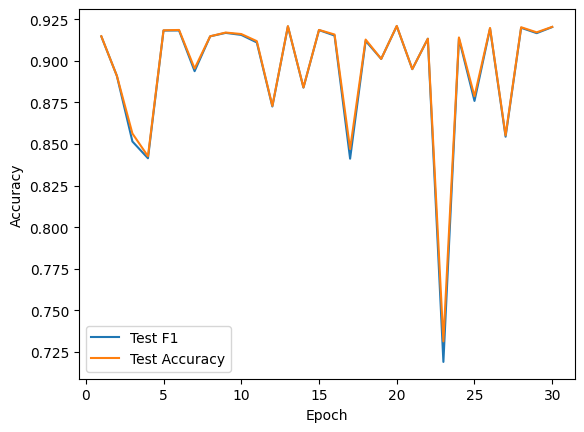

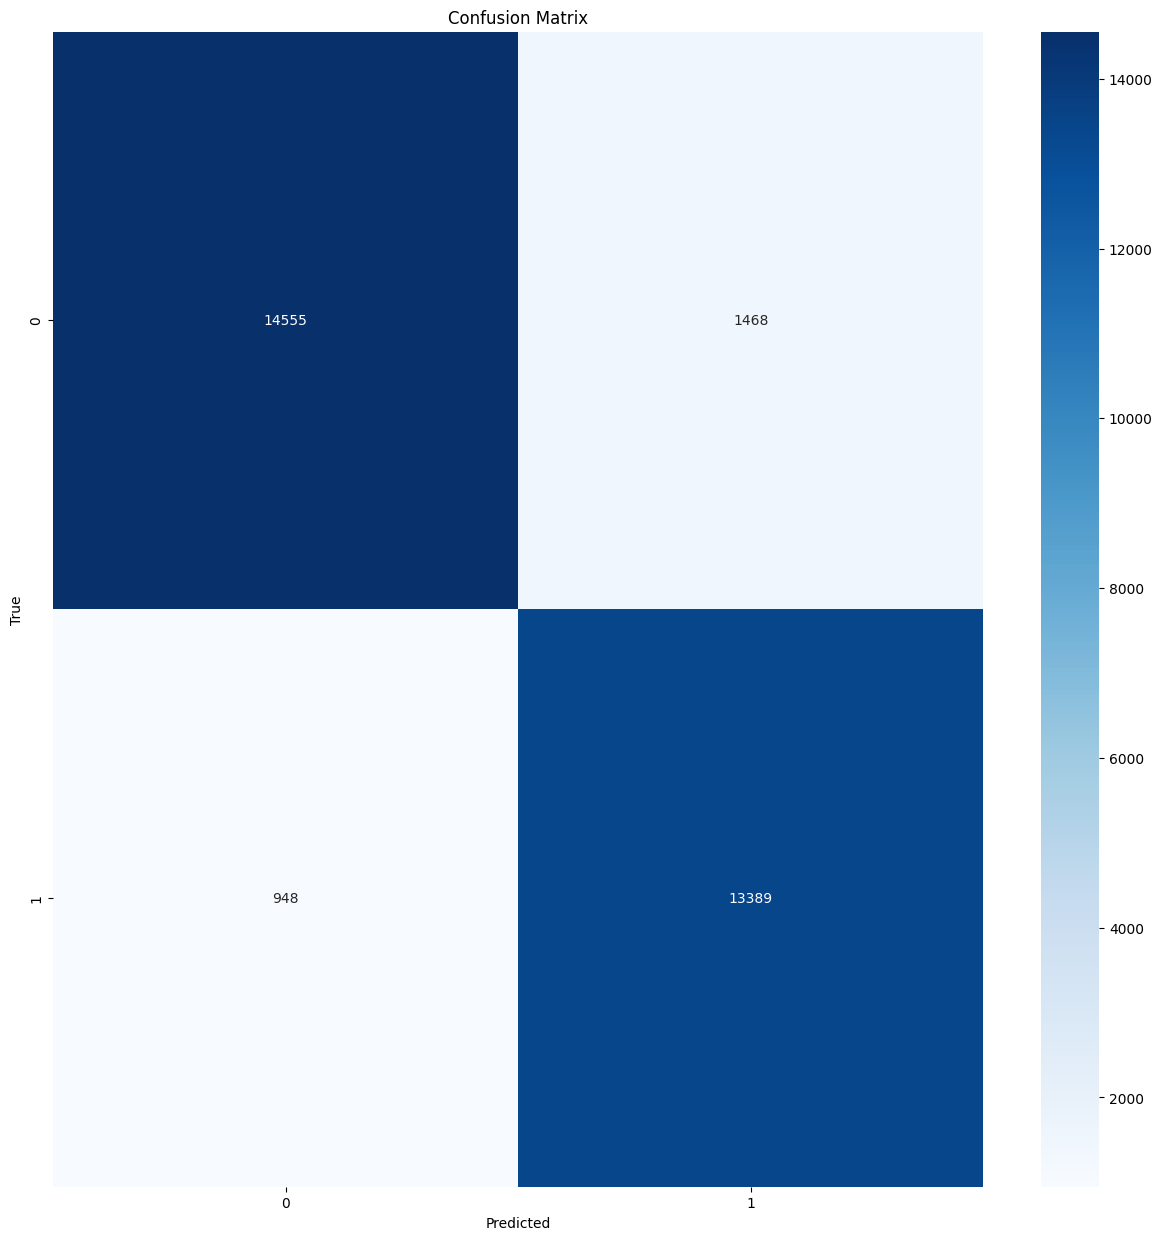

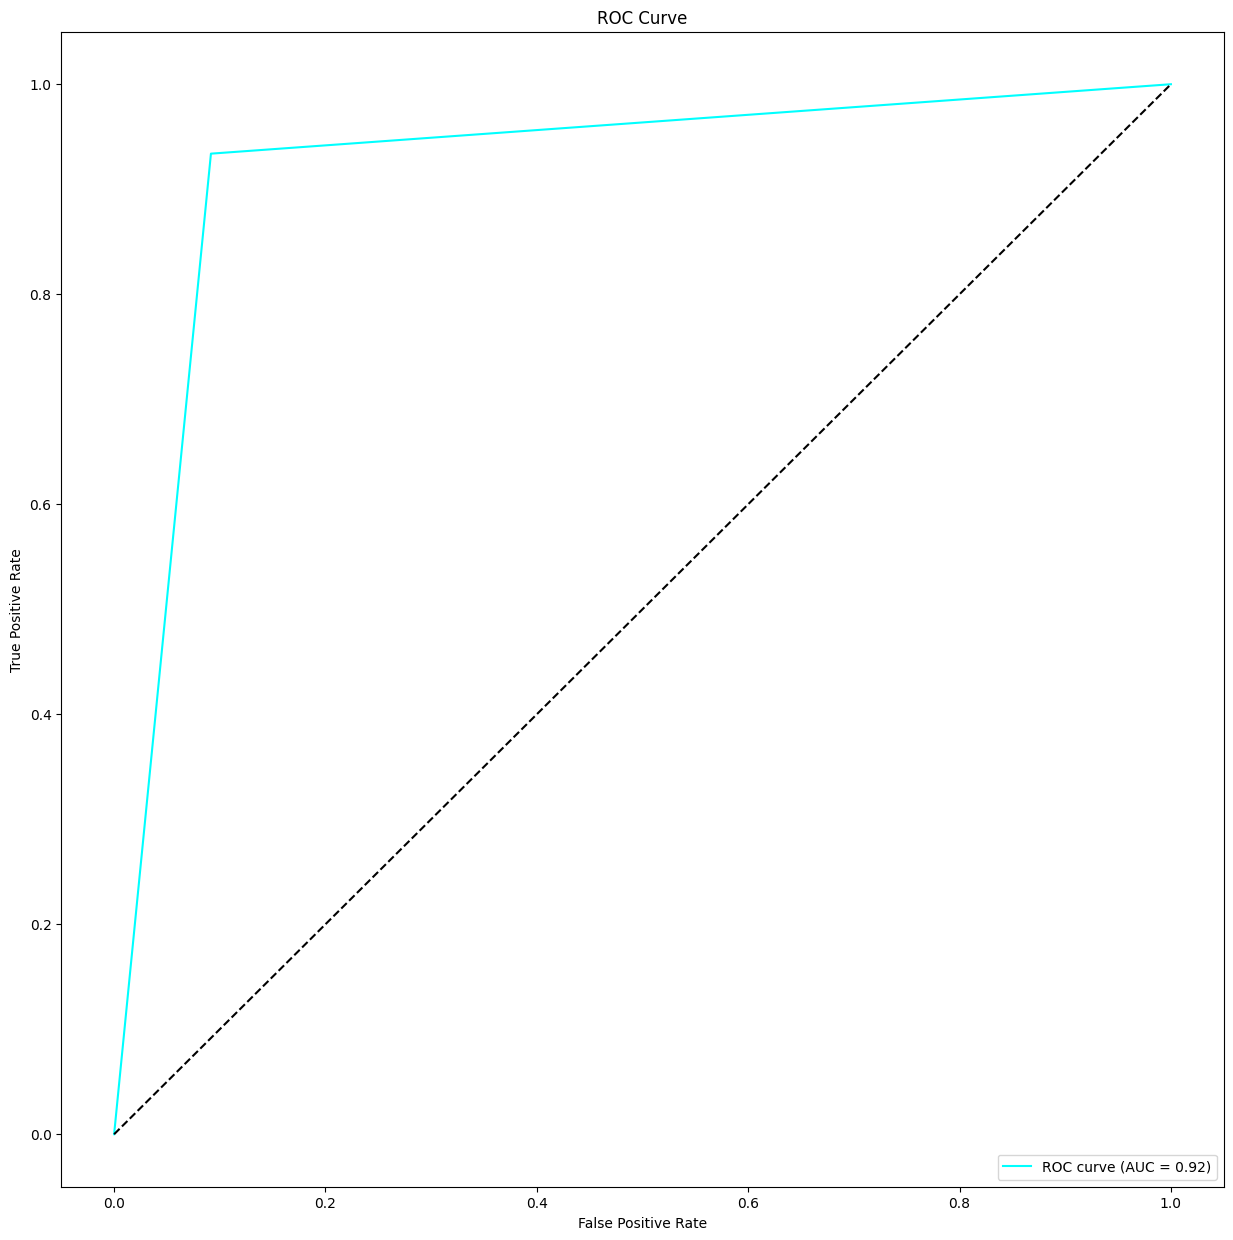

              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     16023
         1.0       0.90      0.93      0.92     14337

    accuracy                           0.92     30360
   macro avg       0.92      0.92      0.92     30360
weighted avg       0.92      0.92      0.92     30360



(0.9204216073781292,
 0.9210666263989534,
 0.9204216073781292,
 0.9204740319125098,
 {'Acc': {'Acc': 0.9209815546772069,
   'F1': 0.9208526986449215,
   'Auc': 0.9757517606593552,
   'Epoch': 20,
   'Auc_Per_Class': 0.9757517606593552},
  'Macro-F1': {'Acc': 0.9209815546772069,
   'F1': 0.9208526986449215,
   'Auc': 0.9757517606593552,
   'Epoch': 20,
   'Auc_Per_Class': 0.9757517606593552},
  'AUC': {'Acc': 0.9201910408432148,
   'F1': 0.9198525551497483,
   'Auc': 0.9759264959633709,
   'Epoch': 28,
   'Auc_Per_Class': 0.9759264959633709}})

In [9]:
label_columns = 'sex_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
    
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=False, report=True)

### Race

Training Early Fusion Model:
The number of parameters of the model are: 99075
Epoch 1/30 - Test Accuracy: 0.6895, macro-f1: 0.4867, macro-AUC: 0.7586
Epoch 1/30 - Training Time: 12.55 seconds | Inference Time: 2.42 seconds
Epoch 2/30 - Test Accuracy: 0.6169, macro-f1: 0.4571, macro-AUC: 0.7631
Epoch 2/30 - Training Time: 17.22 seconds | Inference Time: 3.04 seconds
Epoch 3/30 - Test Accuracy: 0.6525, macro-f1: 0.4724, macro-AUC: 0.7662
Epoch 3/30 - Training Time: 15.64 seconds | Inference Time: 2.59 seconds
Epoch 4/30 - Test Accuracy: 0.6210, macro-f1: 0.4551, macro-AUC: 0.7624
Epoch 4/30 - Training Time: 11.38 seconds | Inference Time: 2.91 seconds
Epoch 5/30 - Test Accuracy: 0.5977, macro-f1: 0.4530, macro-AUC: 0.7652
Epoch 5/30 - Training Time: 13.36 seconds | Inference Time: 3.46 seconds
Epoch 6/30 - Test Accuracy: 0.6375, macro-f1: 0.4656, macro-AUC: 0.7664
Epoch 6/30 - Training Time: 12.78 seconds | Inference Time: 2.00 seconds
Epoch 7/30 - Test Accuracy: 0.5870, macro-f1: 0.4411

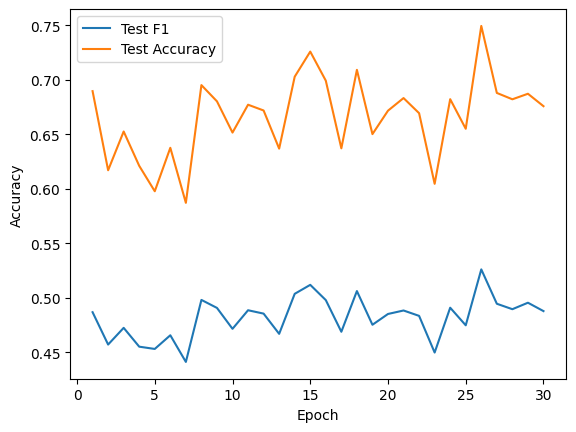

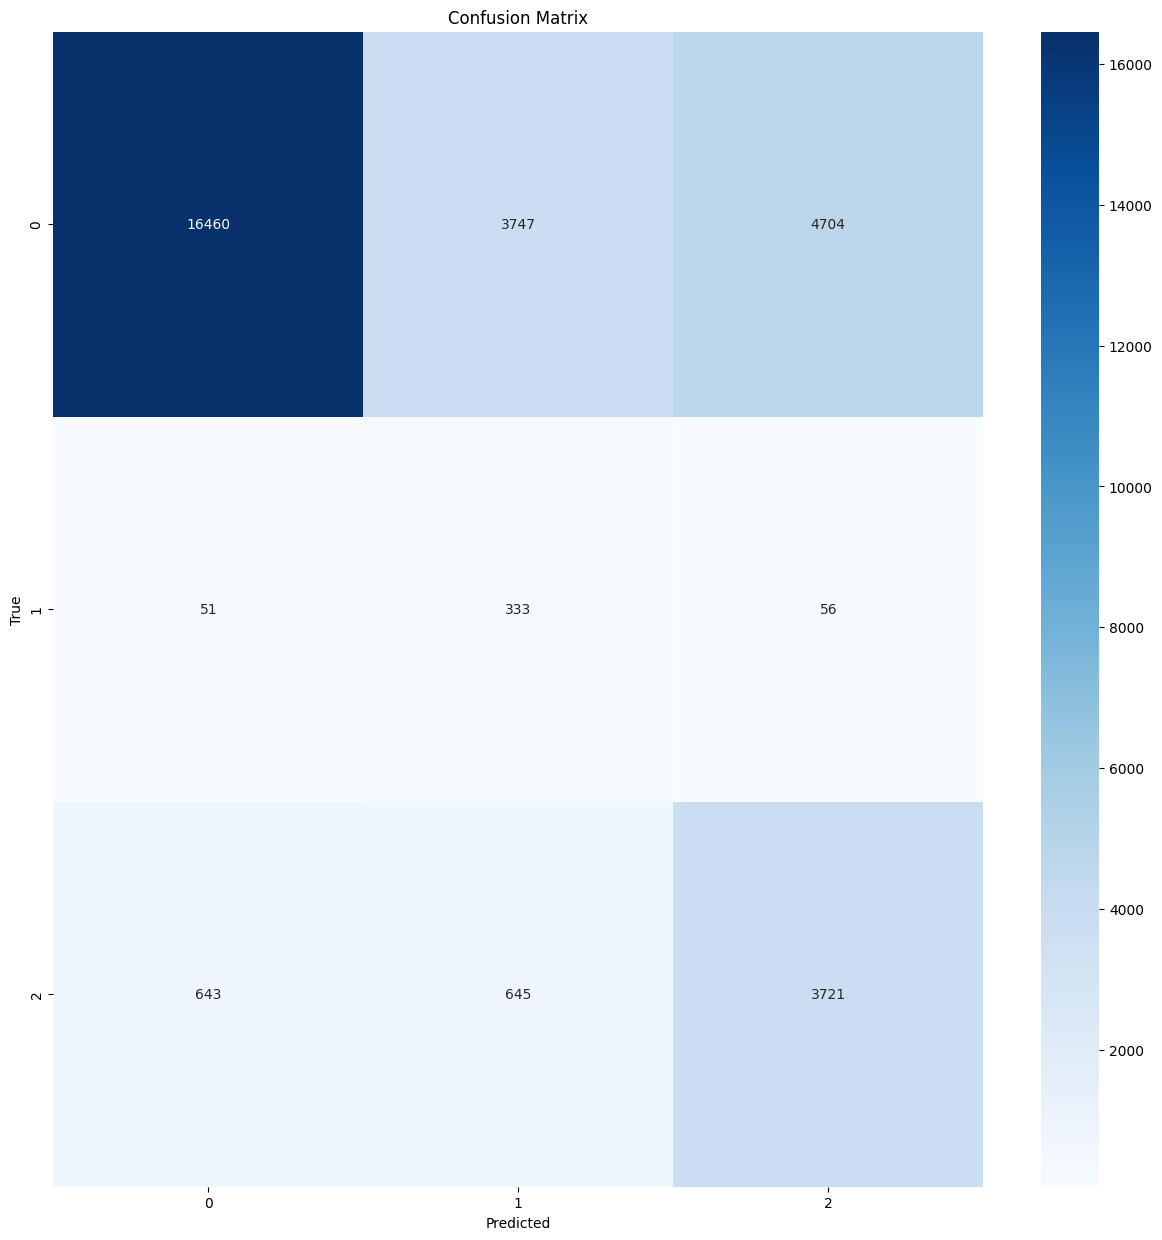

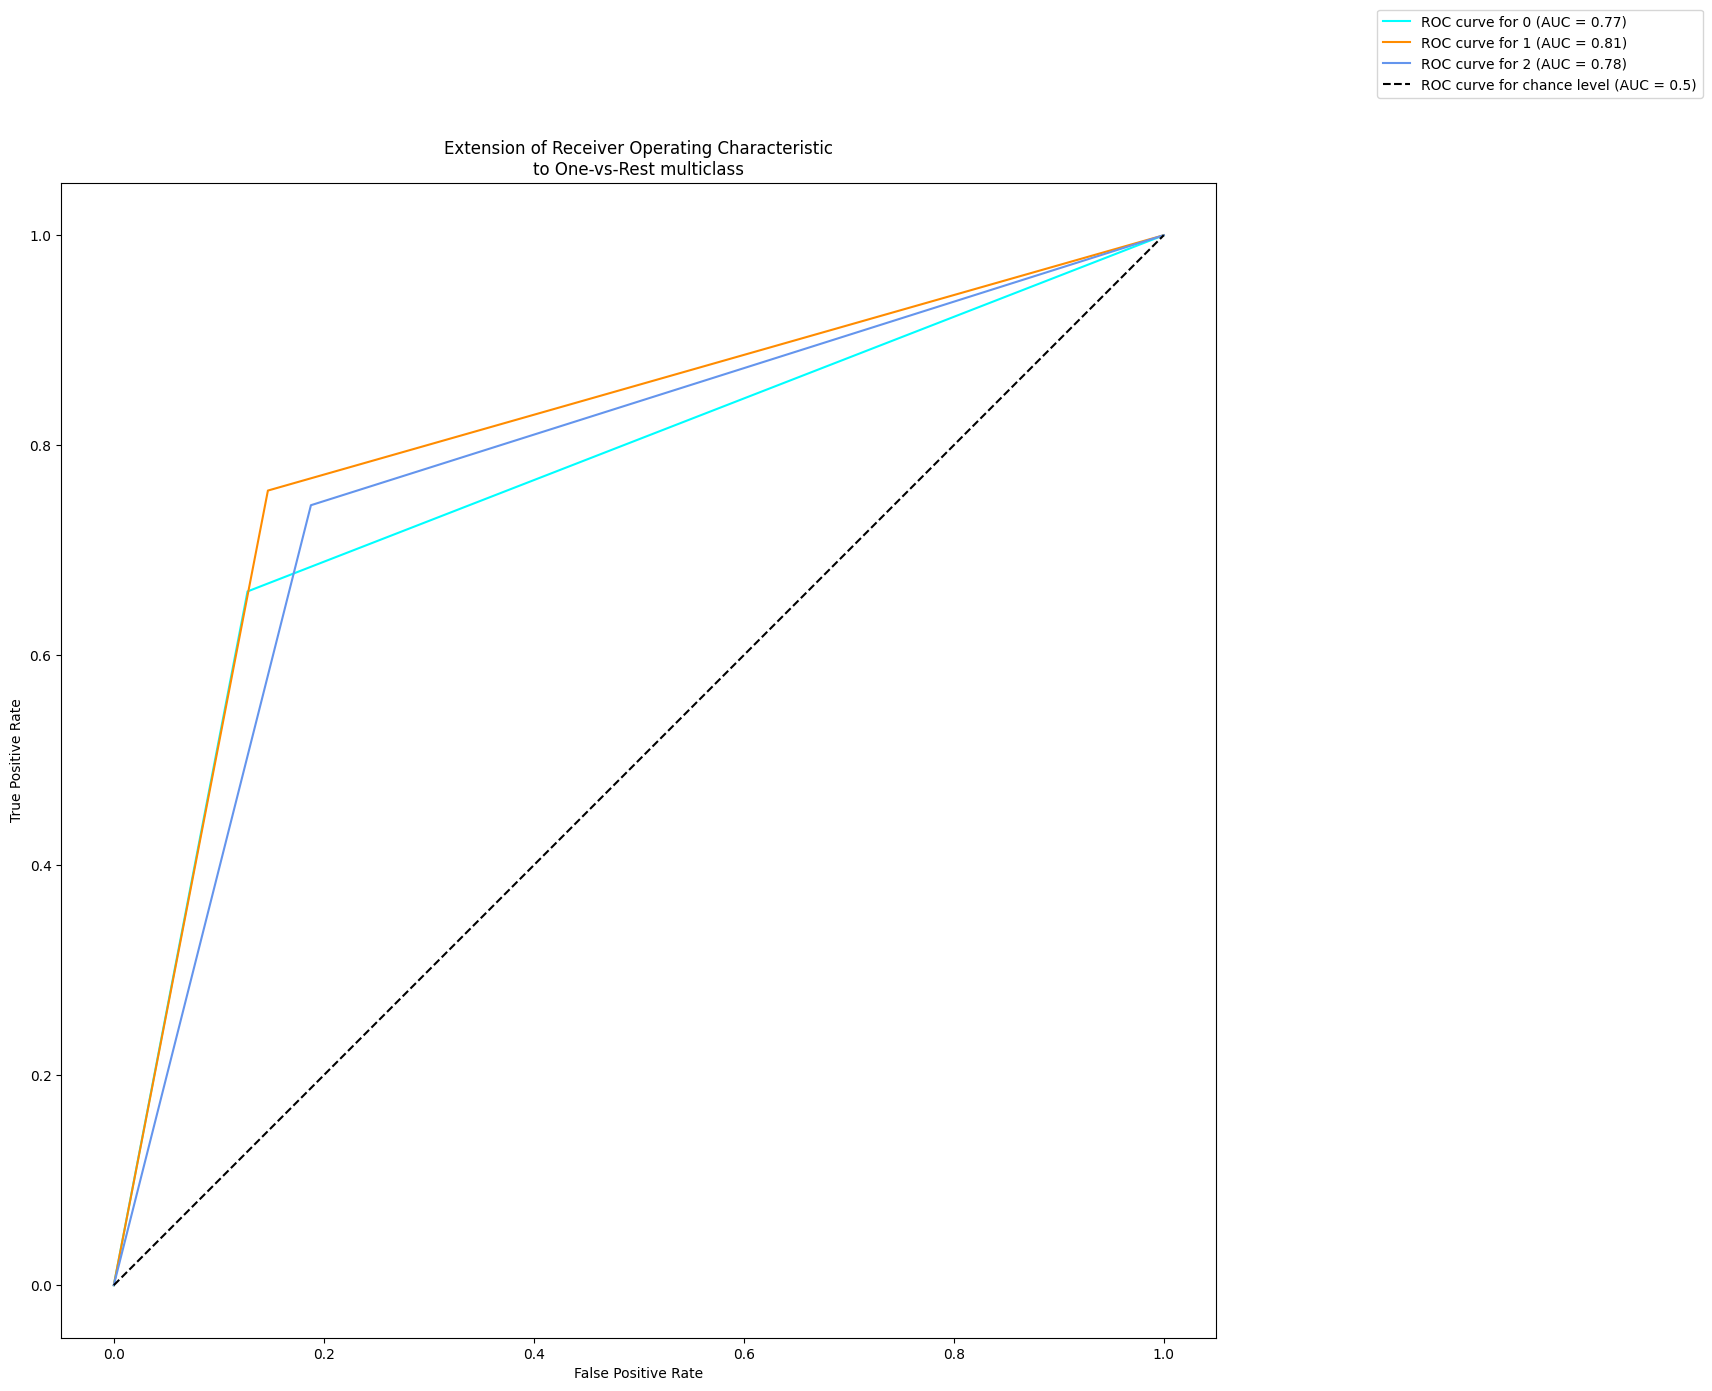

              precision    recall  f1-score   support

           0       0.96      0.66      0.78     24911
           1       0.07      0.76      0.13       440
           2       0.44      0.74      0.55      5009

    accuracy                           0.68     30360
   macro avg       0.49      0.72      0.49     30360
weighted avg       0.86      0.68      0.74     30360



(0.6756916996047431,
 0.86073320676014,
 0.6756916996047431,
 0.7350246370583968,
 {'Acc': {'Acc': 0.7493083003952569,
   'F1': 0.5260034538444259,
   'Auc': 0.7786057029628274,
   'Epoch': 26,
   'Auc_Per_Class': array([0.77715549, 0.78450869, 0.77415293])},
  'Macro-F1': {'Acc': 0.7493083003952569,
   'F1': 0.5260034538444259,
   'Auc': 0.7786057029628274,
   'Epoch': 26,
   'Auc_Per_Class': array([0.77715549, 0.78450869, 0.77415293])},
  'AUC': {'Acc': 0.6870882740447958,
   'F1': 0.49542685053169766,
   'Auc': 0.7846673724186926,
   'Epoch': 29,
   'Auc_Per_Class': array([0.76938685, 0.8047627 , 0.77985257])}})

In [10]:
label_columns = 'race_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
    
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=False, report=True)